
4-PSK
Símbolo	Valor
0	1.0000+0.0000j
1	0.0000+1.0000j
2	-1.0000+0.0000j
3	-0.0000-1.0000j


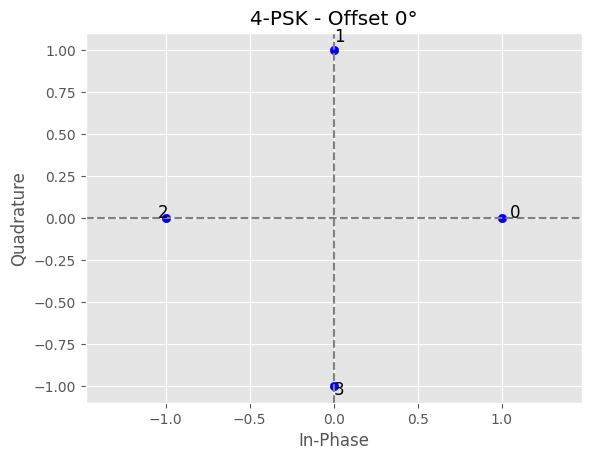


4-QAM
Símbolo	Valor
0	-0.7071+0.7071j
1	0.7071+0.7071j
2	-0.7071-0.7071j
3	0.7071-0.7071j


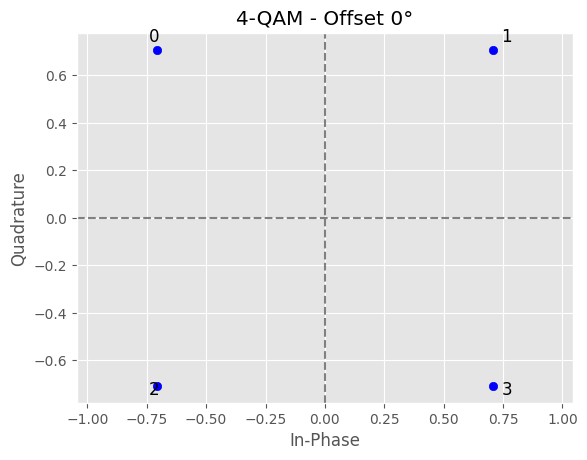


16-PSK
Símbolo	Valor
0	1.0000+0.0000j
1	0.9239+0.3827j
2	0.7071+0.7071j
3	0.3827+0.9239j
4	0.0000+1.0000j
5	-0.3827+0.9239j
6	-0.7071+0.7071j
7	-0.9239+0.3827j
8	-1.0000+0.0000j
9	-0.9239-0.3827j
10	-0.7071-0.7071j
11	-0.3827-0.9239j
12	-0.0000-1.0000j
13	0.3827-0.9239j
14	0.7071-0.7071j
15	0.9239-0.3827j


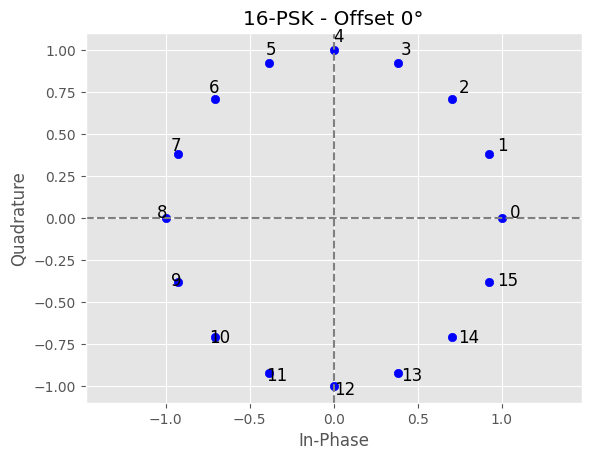


16-QAM
Símbolo	Valor
0	-0.9487+0.9487j
1	-0.3162+0.9487j
2	0.3162+0.9487j
3	0.9487+0.9487j
4	-0.9487+0.3162j
5	-0.3162+0.3162j
6	0.3162+0.3162j
7	0.9487+0.3162j
8	-0.9487-0.3162j
9	-0.3162-0.3162j
10	0.3162-0.3162j
11	0.9487-0.3162j
12	-0.9487-0.9487j
13	-0.3162-0.9487j
14	0.3162-0.9487j
15	0.9487-0.9487j


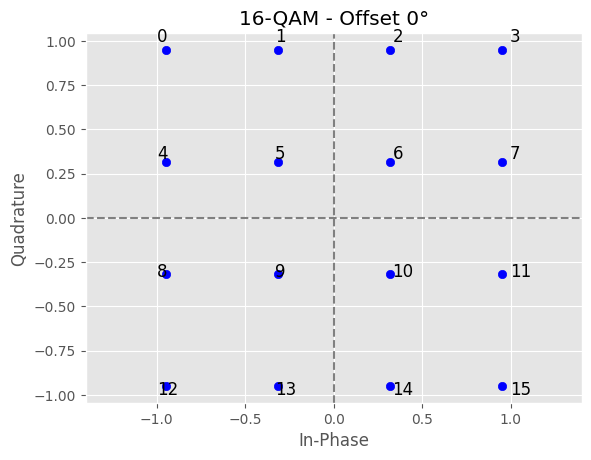


8-QAM
Símbolo	Valor
0	1.0000+0.0000j
1	0.7071+0.7071j
2	0.0000+1.0000j
3	-0.7071+0.7071j
4	-1.0000+0.0000j
5	-0.7071-0.7071j
6	0.0000-1.0000j
7	0.7071-0.7071j


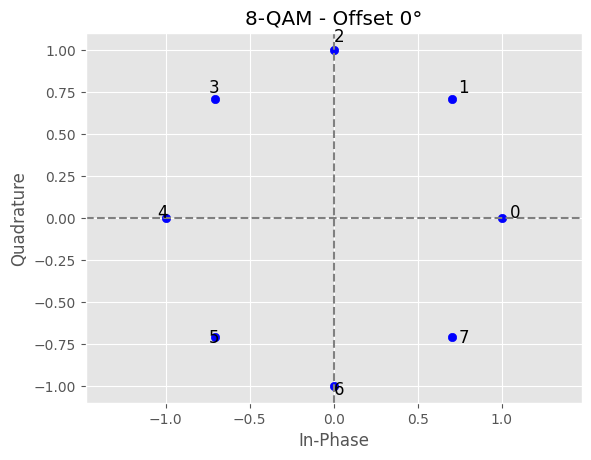

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro global de desfase (en grados)
phase_offset_deg = 0  # Cambia este valor para ajustar el ángulo
offset_rad = np.deg2rad(phase_offset_deg)

def generate_psk_signal(M):
    symbols = np.arange(M)
    angles = 2 * np.pi * symbols / M + offset_rad
    baseband = np.exp(1j * angles)
    return symbols, baseband

def generate_qam_signal(M):
    m_side = int(np.sqrt(M))
    x = np.arange(-m_side+1, m_side, 2)
    y = np.arange(-m_side+1, m_side, 2)
    symbols = np.array([xi + 1j*yi for yi in reversed(y) for xi in x])
    symbols /= np.sqrt((np.abs(symbols)**2).mean())  # Normalización
    symbols *= np.exp(1j * offset_rad)  # Aplicar desfase
    return symbols

def generate_8qam_signal():
    r = 1.0
    angles = np.array([0, 45, 90, 135, 180, -135, -90, -45])
    angles_rad = np.deg2rad(angles) + offset_rad
    symbols = r * np.exp(1j * angles_rad)
    return symbols

def psk_constellation(M):
    points = []
    for i in range(M):
        point = np.exp(1j * 2 * np.pi * i / M + offset_rad)
        points.append(point)
    return np.array(points)

def qam_constellation(M):
    m_side = int(np.sqrt(M))
    points = []
    for i in range(m_side):
        for j in range(m_side):
            x = 2*j - (m_side - 1)
            y = 2*(m_side - 1 - i) - (m_side - 1)
            points.append(((x + 1j*y) / (m_side - 1)) * np.exp(1j * offset_rad))
    return np.array(points)

def eight_qam_constellation():
    angles = np.array([0, 45, 90, 135, 180, -135, -90, -45])
    angles_rad = np.deg2rad(angles) + offset_rad
    return np.exp(1j * angles_rad)

def plot_constellation(symbols, title):
    plt.figure()
    plt.scatter(symbols.real, symbols.imag, color='blue')
    for i, sym in enumerate(symbols):
        plt.text(sym.real * 1.05, sym.imag * 1.05, str(i), fontsize=12)
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
    plt.grid(True)
    plt.title(f"{title} - Offset {phase_offset_deg}°")
    plt.xlabel("In-Phase")
    plt.ylabel("Quadrature")
    plt.axis('equal')
    plt.show()

def print_truth_table(symbols):
    print("Símbolo\tValor")
    for i, s in enumerate(symbols):
        print(f"{i}\t{s:.4f}")

# Prueba con PSK, QAM y 8-QAM
M_list = [4, 16]
for M in M_list:
    print(f"\n{M}-PSK")
    symbols, psk = generate_psk_signal(M)
    print_truth_table(psk)
    plot_constellation(psk, f"{M}-PSK")

    print(f"\n{M}-QAM")
    qam = generate_qam_signal(M)
    print_truth_table(qam)
    plot_constellation(qam, f"{M}-QAM")

print("\n8-QAM")
qam8 = generate_8qam_signal()
print_truth_table(qam8)
plot_constellation(qam8, "8-QAM")


<ipython-input-9-9ffa00597ddd>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name, n)


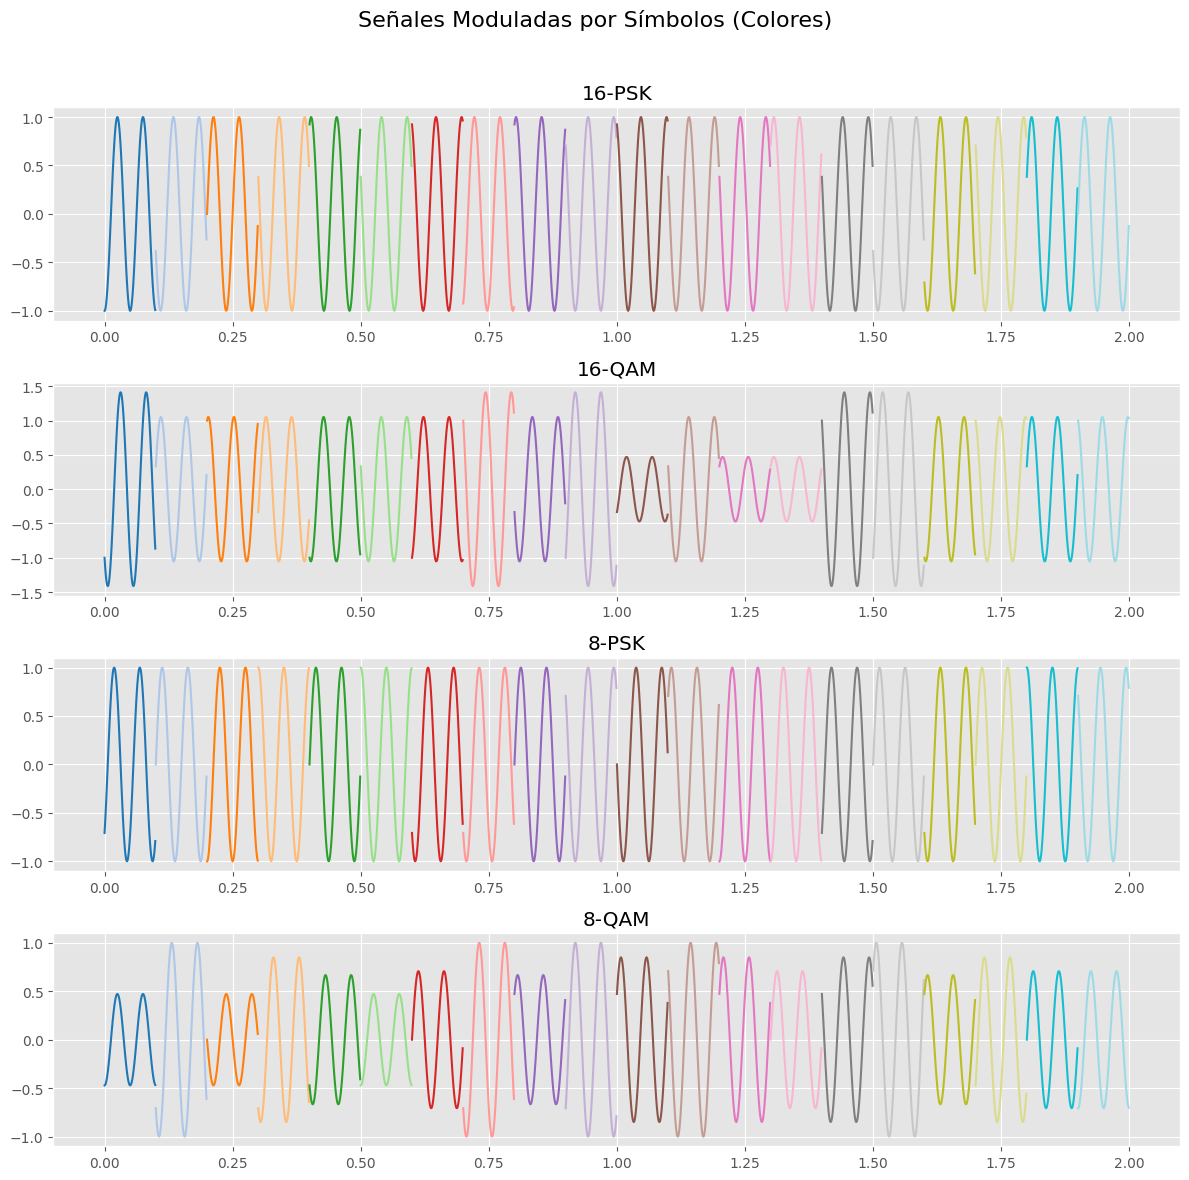


Tabla de Verdad - 16-PSK
Bits       Símbolo (Re, Im)
0000       (1.000, 0.000)
0001       (0.924, 0.383)
0010       (0.707, 0.707)
0011       (0.383, 0.924)
0100       (0.000, 1.000)
0101       (-0.383, 0.924)
0110       (-0.707, 0.707)
0111       (-0.924, 0.383)
1000       (-1.000, 0.000)
1001       (-0.924, -0.383)
1010       (-0.707, -0.707)
1011       (-0.383, -0.924)
1100       (-0.000, -1.000)
1101       (0.383, -0.924)
1110       (0.707, -0.707)
1111       (0.924, -0.383)


<ipython-input-9-9ffa00597ddd>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hsv', n)


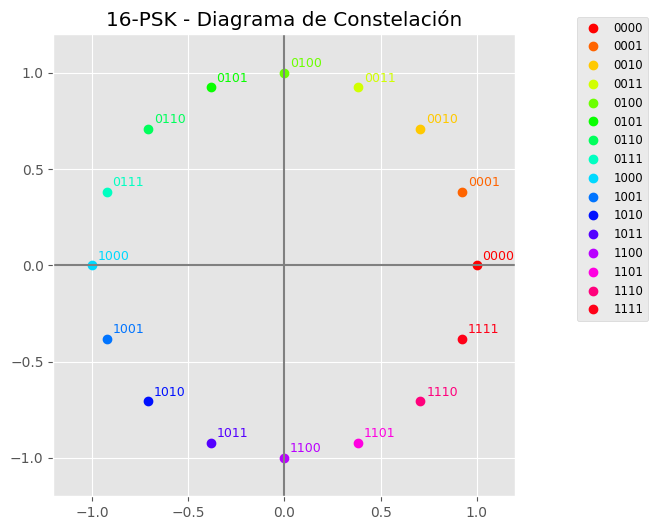

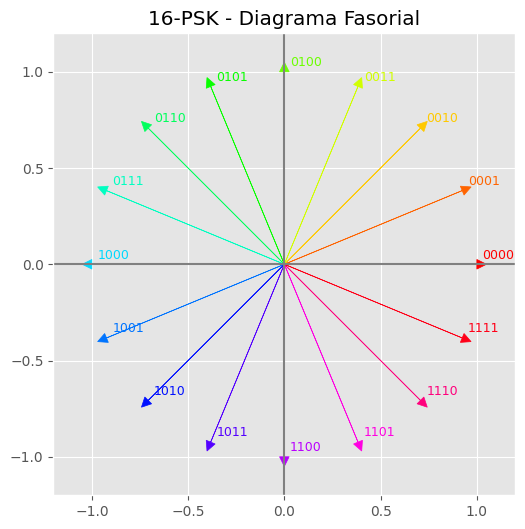


Tabla de Verdad - 16-QAM
Bits       Símbolo (Re, Im)
0000       (1.000, -1.000)
0001       (0.333, -1.000)
0010       (-0.333, -1.000)
0011       (-1.000, -1.000)
0100       (1.000, -0.333)
0101       (0.333, -0.333)
0110       (-0.333, -0.333)
0111       (-1.000, -0.333)
1000       (1.000, 0.333)
1001       (0.333, 0.333)
1010       (-0.333, 0.333)
1011       (-1.000, 0.333)
1100       (1.000, 1.000)
1101       (0.333, 1.000)
1110       (-0.333, 1.000)
1111       (-1.000, 1.000)


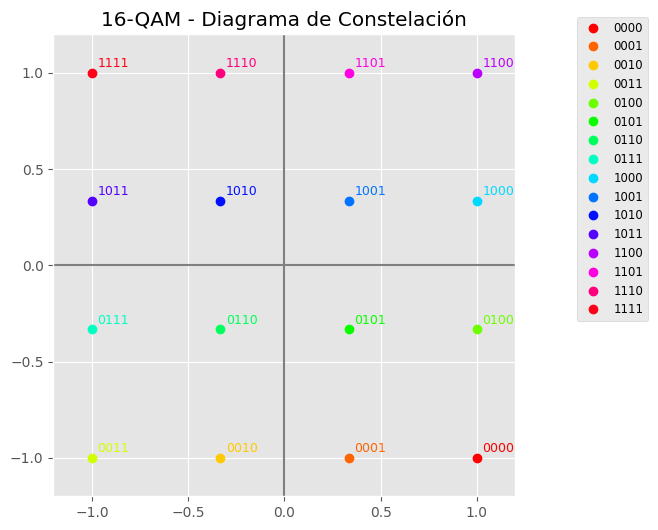

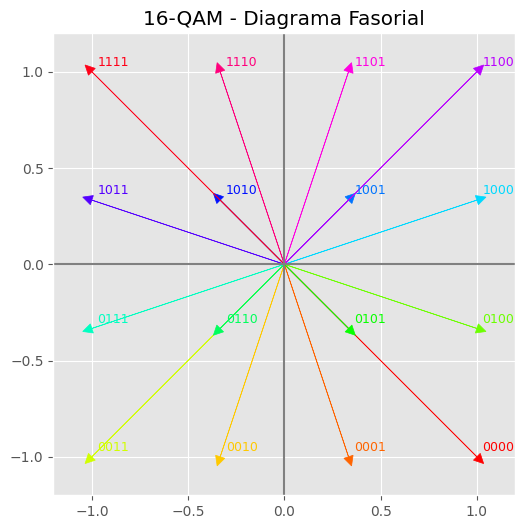


Tabla de Verdad - 8-PSK
Bits       Símbolo (Re, Im)
000        (1.000, 0.000)
001        (0.707, 0.707)
010        (0.000, 1.000)
011        (-0.707, 0.707)
100        (-1.000, 0.000)
101        (-0.707, -0.707)
110        (-0.000, -1.000)
111        (0.707, -0.707)


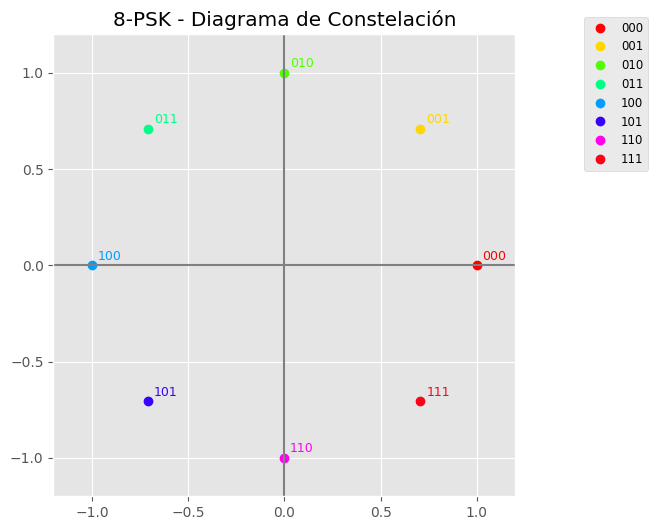

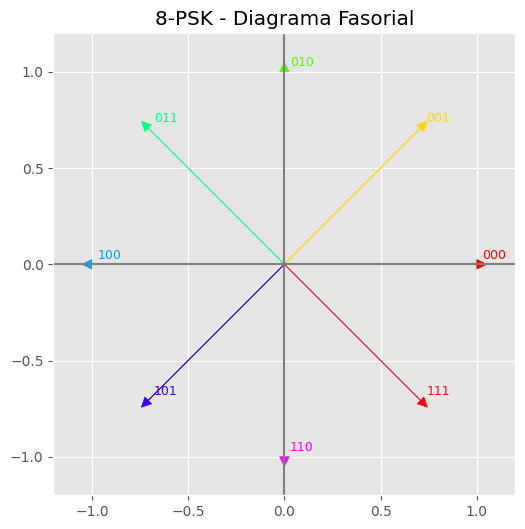


Tabla de Verdad - 8-QAM
Bits       Símbolo (Re, Im)
000        (0.833, 0.000)
001        (0.589, 0.589)
010        (0.000, 0.583)
011        (-0.412, 0.412)
100        (-0.833, 0.000)
101        (-0.589, -0.589)
110        (-0.000, -0.583)
111        (0.412, -0.412)


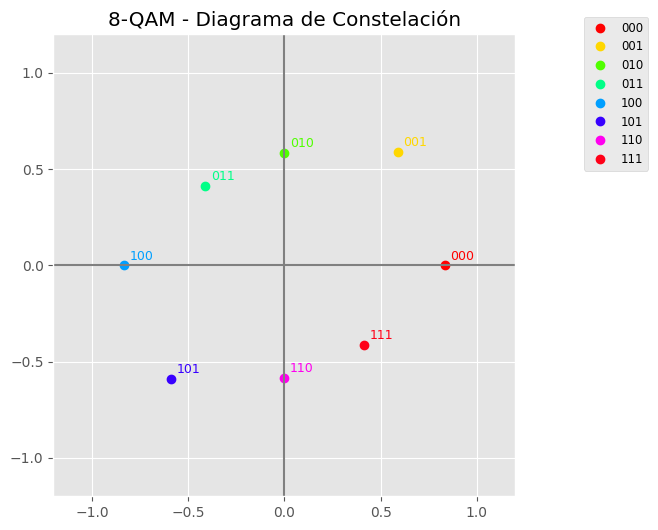

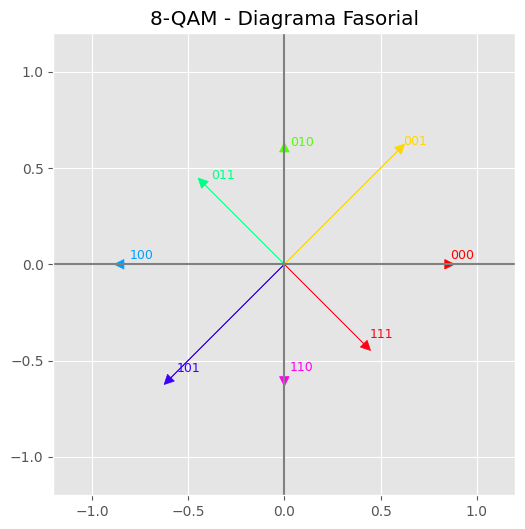

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, style

style.use('ggplot')

# Funciones de utilidad
def generate_colors(n, cmap_name='tab20'):
    cmap = cm.get_cmap(cmap_name, n)
    return [cmap(i) for i in range(n)]

def get_colors(n):
    cmap = cm.get_cmap('hsv', n)
    return [cmap(i) for i in range(n)]

# Señales PSK y QAM
def generate_psk_signal(M, fc, fs, T):
    bits_per_symbol = int(np.log2(M))
    num_symbols = int(T * fs / 100)
    symbols = np.random.randint(0, M, num_symbols)
    angles = 2 * np.pi * symbols / M
    baseband = np.exp(1j * angles)

    t = np.arange(num_symbols * 100) / fs
    baseband_upsampled = np.repeat(baseband, 100)
    carrier = np.exp(1j * 2 * np.pi * fc * t)
    modulated = np.real(baseband_upsampled * carrier)
    return t, modulated, num_symbols

def generate_qam_signal(M, fc, fs, T):
    num_symbols = int(T * fs / 100)
    if M == 8:
        real_vals = [1, -1, 0, 1.5, -1.5]
        imag_vals = [1, -1, 0, 1.5, -1.5]
        symbols = np.random.choice(real_vals, size=num_symbols) + 1j * np.random.choice(imag_vals, size=num_symbols)
        symbols /= np.max(np.abs(symbols))
    elif M == 16:
        real_vals = [-3, -1, 1, 3]
        imag_vals = [-3, -1, 1, 3]
        symbols = [x + 1j * y for x in real_vals for y in imag_vals]
        symbols = np.random.choice(symbols, size=num_symbols)
        symbols = np.array(symbols) / 3
    else:
        raise ValueError("Solo se permiten 8-QAM o 16-QAM")

    t = np.arange(num_symbols * 100) / fs
    baseband_upsampled = np.repeat(symbols, 100)
    carrier = np.exp(1j * 2 * np.pi * fc * t)
    modulated = np.real(baseband_upsampled * carrier)
    return t, modulated, num_symbols

# Constelaciones
def psk_constellation(M):
    bits_per_symbol = int(np.log2(M))
    symbols, labels = [], []
    for i in range(M):
        bits = format(i, f'0{bits_per_symbol}b')
        point = np.exp(1j * 2 * np.pi * i / M)
        symbols.append(point)
        labels.append(bits)
    return symbols, labels

def qam_constellation(M):
    bits_per_symbol = int(np.log2(M))
    m_side = int(np.sqrt(M))
    if m_side**2 != M:
        raise ValueError("QAM solo implementado para modulaciones cuadradas como 16-QAM")
    real_vals = np.linspace(-m_side + 1, m_side - 1, m_side)[::-1]
    imag_vals = np.linspace(-m_side + 1, m_side - 1, m_side)
    symbols, labels = [], []
    idx = 0
    for y in imag_vals:
        for x in real_vals:
            bits = format(idx, f'0{bits_per_symbol}b')
            symbols.append((x + 1j * y) / (m_side - 1))
            labels.append(bits)
            idx += 1
    return symbols, labels

def qam8_constellation():
    bits = ['000', '001', '010', '011', '100', '101', '110', '111']
    angles = np.linspace(0, 2*np.pi, 9)[:-1]
    amplitudes = [1, 1, 0.7, 0.7, 1, 1, 0.7, 0.7]
    symbols = [a * np.exp(1j * ang) for a, ang in zip(amplitudes, angles)]
    return [s/1.2 for s in symbols], bits

# Graficar
def plot_colored_signal(t, signal, num_symbols, title, ax):
    samples_per_symbol = len(t) // num_symbols
    colors = generate_colors(num_symbols)
    for i in range(num_symbols):
        start = i * samples_per_symbol
        end = (i + 1) * samples_per_symbol
        ax.plot(t[start:end], signal[start:end], color=colors[i])
    ax.set_title(title)

def plot_constellation(symbols, labels, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    colors = get_colors(len(symbols))
    for i, (s, b) in enumerate(zip(symbols, labels)):
        ax.plot(np.real(s), np.imag(s), 'o', color=colors[i], label=b)
        ax.text(np.real(s)+0.03, np.imag(s)+0.03, b, fontsize=9, color=colors[i])
    ax.set_title(f"{title} - Diagrama de Constelación")
    ax.axhline(0, color='gray')
    ax.axvline(0, color='gray')
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05), fontsize='small')
    plt.show()

def plot_fasorial(symbols, labels, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    colors = get_colors(len(symbols))
    for i, (s, b) in enumerate(zip(symbols, labels)):
        ax.arrow(0, 0, np.real(s), np.imag(s), head_width=0.05, head_length=0.05, color=colors[i])
        ax.text(np.real(s)+0.03, np.imag(s)+0.03, b, fontsize=9, color=colors[i])
    ax.set_title(f"{title} - Diagrama Fasorial")
    ax.axhline(0, color='gray')
    ax.axvline(0, color='gray')
    ax.grid(True)
    ax.set_aspect('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    plt.show()

def print_truth_table(labels, symbols, title):
    print(f"\nTabla de Verdad - {title}")
    print(f"{'Bits':<10} {'Símbolo (Re, Im)'}")
    for b, s in zip(labels, symbols):
        print(f"{b:<10} ({np.real(s):.3f}, {np.imag(s):.3f})")

# Parámetros generales
fc = 20
fs = 1000
T = 2

# Señales
fig, axs = plt.subplots(4, 1, figsize=(12, 12))
fig.suptitle("Señales Moduladas por Símbolos (Colores)", fontsize=16)

t, sig, n = generate_psk_signal(16, fc, fs, T)
plot_colored_signal(t, sig, n, "16-PSK", axs[0])

t, sig, n = generate_qam_signal(16, fc, fs, T)
plot_colored_signal(t, sig, n, "16-QAM", axs[1])

t, sig, n = generate_psk_signal(8, fc, fs, T)
plot_colored_signal(t, sig, n, "8-PSK", axs[2])

t, sig, n = generate_qam_signal(8, fc, fs, T)
plot_colored_signal(t, sig, n, "8-QAM", axs[3])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Constelaciones y Fasoriales
modulations = [
    ("16-PSK", *psk_constellation(16)),
    ("16-QAM", *qam_constellation(16)),
    ("8-PSK", *psk_constellation(8)),
    ("8-QAM", *qam8_constellation())
]

for name, symbols, labels in modulations:
    print_truth_table(labels, symbols, name)
    plot_constellation(symbols, labels, name)
    plot_fasorial(symbols, labels, name)
